<a href="https://colab.research.google.com/github/yashh0316/datascienCeproject/blob/main/DATASCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Basics of Coding R/Python

In [ ]:
#1 Using Comments R/Python

#2 executing commands

result = "DATA SCIENCE "
print(result)

#3 import package

import pandas as pd

#4 Getting Data into python

path = "/content/drive/MyDrive/dataset/Auto Sales data.csv"
data = pd.read_csv(path)
#print(data)

#5 Saving output

data.to_csv('output.csv', index=False)

#6 Access and print specific variables/columns

print(data['ORDERNUMBER'])


DATA SCIENCE 
0      10107
1      10121
2      10134
3      10145
4      10168
       ...  
103    10167
104    10178
105    10186
106    10197
107    10222
Name: ORDERNUMBER, Length: 108, dtype: int64


#2: DATA PREPARATION

In [ ]:
#1 How to Add an Index Field Using R/Python

index = pd.DataFrame({"Index": data.index})
data = pd.concat([index, data], axis=1)
print(data)

#2 How to Change Misleading Field Values Using R/Python

misleading_values = {34: 40, 50: 60, 75: 80}
data['QUANTITYORDERED'].replace(misleading_values, inplace=True)
print(data['QUANTITYORDERED'])

#3 How to Re Express Categorical Field Values Using R/Python

#data['DEALSIZE'] = data['DEALSIZE'].replace('large', 'small','medium')
#data = pd.get_dummies(data, columns=['DEALSIZE'])
#print(data['DEALSIZE'])


print( ' How to Standardise Numeric Fields Using R/Python' )

from sklearn.preprocessing import StandardScaler

numerical_columns_to_standardize = ['QUANTITYORDERED', 'PRICEEACH']


scaler = StandardScaler()

data[numerical_columns_to_standardize] = scaler.fit_transform(data[numerical_columns_to_standardize])


standardized_file_path = 'standardized_dataset.csv'
data.to_csv(standardized_file_path, index=False)
print(data)
print("\nSummary Statistics After Standardization:")
print(data[['QUANTITYORDERED', 'PRICEEACH']].describe())


# 5 How to Identify Outliers Using R/Python

import numpy as np


numerical_columns = ['QUANTITYORDERED', 'PRICEEACH']

z_scores = np.abs((data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std())

z_score_threshold = 1

outliers = (z_scores > z_score_threshold).any(axis=1)

print("Rows with outliers:")
print(data[outliers])

outliers_removed_file_path = 'dataset_without_outliers.csv'
data[~outliers].to_csv(outliers_removed_file_path, index=False)

print("Rows with outliers:")
print(data[outliers])

standardized_file_path = 'standardized_dataset_with_outliers.csv'
data.to_csv(standardized_file_path, index=False)



     Index  ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        0        10107               30      95.70                2  2871.00   
1        1        10121               34      81.35                5  2765.90   
2        2        10134               41      94.74                2  3884.34   
3        3        10145               45      83.26                6  3746.70   
4        4        10168               36      96.66                1  3479.76   
..     ...          ...              ...        ...              ...      ...   
103    103        10167               44     134.64                9  5924.16   
104    104        10178               24     145.52               12  3492.48   
105    105        10186               26     148.24                9  3854.24   
106    106        10197               45     118.32                6  5324.40   
107    107        10222               49     122.40               12  5997.60   

     DAYS_SINCE_LASTORDER  

#3: EXPLORATORY DATA ANALYSIS


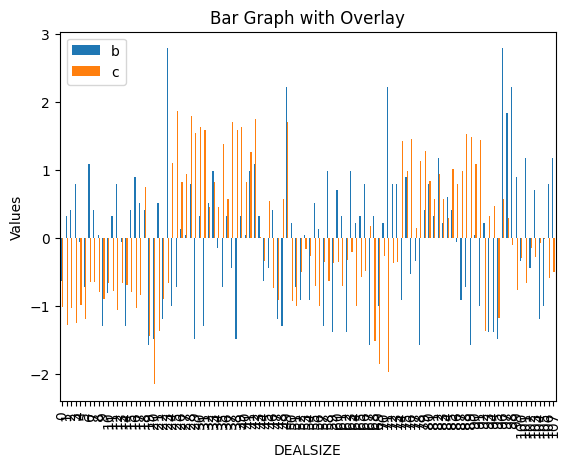

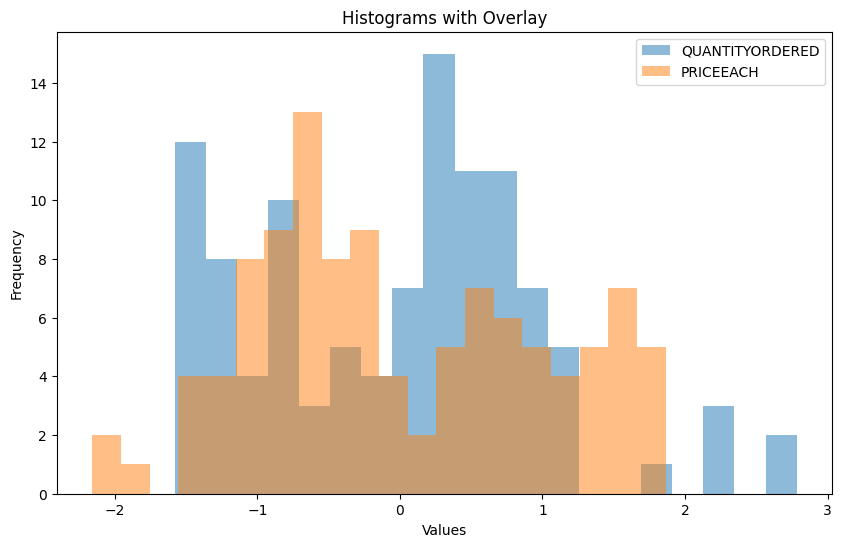

     Index  ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        0        10107        -0.631463  -1.014272                2  2871.00   
1        1        10121         0.317049  -1.284553                5  2765.90   
2        2        10134         0.411900  -1.032354                2  3884.34   
3        3        10145         0.791305  -1.248578                6  3746.70   
4        4        10168        -0.062356  -0.996191                1  3479.76   
..     ...          ...              ...        ...              ...      ...   
103    103        10167         0.696454  -0.280843                9  5924.16   
104    104        10178        -1.200571  -0.075920               12  3492.48   
105    105        10186        -1.010868  -0.024689                9  3854.24   
106    106        10197         0.791305  -0.588228                6  5324.40   
107    107        10222         1.170710  -0.511382               12  5997.60   

     DAYS_SINCE_LASTORDER  

In [ ]:

# 1 How to Construct a Bar Graph with Overlay Using Python

import matplotlib.pyplot as plt

# Assuming 'QUANTITYORDERED' and 'PRICEEACH' are columns in your dataset
a = data.index  # Assuming 'a' corresponds to the index of your DataFrame
b = data['QUANTITYORDERED']
c = data['PRICEEACH']

# Create a DataFrame
df_custom = pd.DataFrame({'a': a, 'b': b, 'c': c}, columns=['a', 'b', 'c'])
df_custom.set_index('a', inplace=True)

# Plotting
df_custom.plot.bar()
plt.title('Bar Graph with Overlay')
plt.xlabel('DEALSIZE')
plt.ylabel('Values')
plt.legend()
plt.show()





# 3  How to Construct Histograms with Overlay Using R/Python

# Plot histograms with overlay
plt.figure(figsize=(10, 6))

# Histogram for 'QUANTITYORDERED'
plt.hist(data['QUANTITYORDERED'], bins=20, alpha=0.5, label='QUANTITYORDERED')

# Histogram for 'PRICEEACH'
plt.hist(data['PRICEEACH'], bins=20, alpha=0.5, label='PRICEEACH')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms with Overlay')
plt.legend()

# Show the plot
plt.show()


# 4  How to Perform Binning Based on Predictive Value Using R/Python

import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer


# Specify the features you want to use for binning
features_for_binning = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

# Specify the target variable
target_variable = 'PRODUCTLINE'

# Extract features and target variable
X = data[features_for_binning]
y = data[target_variable]

# Initialize KBinsDiscretizer
k_bins_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Fit and transform the features
X_binned = k_bins_discretizer.fit_transform(X)

# Create a new DataFrame with the binned features
df_binned = pd.DataFrame(X_binned, columns=[f'{feature}_binned' for feature in features_for_binning])

# Concatenate the binned features with the original DataFrame
data = pd.concat([data, df_binned], axis=1)

# Print the updated DataFrame
print(data)





#4:    DATA PREPARATION PHASE TO MODEL THE DATA

In [ ]:



#How to Build CART Decision Trees Using Python


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=10)

# Fit the model on the resampled training set
tree_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = tree_classifier.predict(X_test)

# Evaluate the performance of the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


NameError: ignored

#5: MODEL EVALUATION



In [ ]:
#5: MODEL EVALUATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
sns.set()

df = pd.read_csv("/content/drive/MyDrive/dataset/Auto Sales data.csv")

#print(df.info())
#print(df.head())
#print(df.describe())
#df.shape
#print(df.isna().sum())
#var = 'target'
#ns.countplot(df[var])
#var = 'age'
#f, ax = plt.subplots(figsize=(15,8))
#sns.distplot(df[var])
#plt.xlim([0,80])
#var = 'chol'
#f, ax = plt.subplots(figsize=(15,8))
#sns.distplot(df[var])
#plt.xlim([0,600])
#var = 'trestbps'
#f, ax = plt.subplots(figsize=(15,8))
#sns.distplot(df[var])
#plt.xlim([0,250])
df.columns
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print("\n\n\t\tIndependent features of Dataset: ")
print(X.head())
print("\n\n\t\tDependent features of Dataset: ")
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 25)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Classification Model Accuracy is: ",metrics.accuracy_score(y_test, y_pred))
import scikitplot as skplt
#skplt.metrics.plot_confusion_matrix(y_test,y_pred)

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

from sklearn.metrics import f1_score
print("Macro F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 Score: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted F1 Score: ",f1_score(y_test, y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC curve for Heart Attack classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))



		Independent features of Dataset: 
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0                   828  Shipped  Motorcycles    95    S10_1678   
1                   757  Shipped  Motorcycles    95    S10_1678   
2                   703  Shipped  Motorcycles    95    S10_1678   
3                   649  Shipped  Motorcycles    95    S10_1678   
4                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        8

ValueError: ignored

#6: NAÏVE BAYES CLASSIFICATION


In [ ]:
#Demonstrate application of Naïve Bayes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB

data = '/content/drive/MyDrive/dataset/Auto Sales data.csv'

df = pd.read_csv(data)

#df.head()
#df.shape
#df.info()
categorical = [var for var in df.columns if df[var].dtype=='O']

#print('There are {} categorical variables\n'.format(len(categorical)))

#print('The categorical variables are :\n\n', categorical)

#df[categorical].isnull().sum()
#df.workclass.unique()

#for var in categorical:

    #print(df[var].value_counts())

#for var in categorical:

  #print(df[var].value_counts()/np.float(len(df)))

#for var in categorical:

    #print(var, ' contains ', len(df[var].unique()), ' labels')

numerical = [var for var in df.columns if df[var].dtype!='O']

#print('There are {} numerical variables\n'.format(len(numerical)))

#print('The numerical variables are :', numerical)

#df[numerical].head()

X = df.drop(['Salary'], axis=1)

y = df['Salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

X_train.dtypes

#categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

#numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

#numerical

#X_train.isnull().sum()

#X_test.isnull().sum()
encoder = ce.OneHotEncoder(cols=['Gender', 'Job Title', 'Country', 'Race'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

X_train.shape

X_test.head()

cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

y_pred

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

y_test.value_counts()

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

ModuleNotFoundError: ignored

#7: NEURAL NETWORKS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

data = '/content/drive/MyDrive/dataset/Auto Sales data.csv'

df = pd.read_csv(data)
df.head(5)

col_names = df.columns
for c in col_names:
	df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

labelEncoder = preprocessing.LabelEncoder()
category_col =['race','marital-status', 'gender', 'income']

for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])

category_col_1 =['workclass', 'education', 'occupation',
               'relationship','native-country']
df_2 = pd.get_dummies(df, columns=category_col_1, drop_first=True)

##unknown Attribute is removed and income class label is appended in the end
dataframe=df_2.drop('fnlwgt',1)
dataframe =dataframe[[c for c in dataframe if c not in ['income']] + ['income']]
dataframe.head(10)

X = dataframe.iloc[:, 0:88].values
y = dataframe.iloc[:, 88].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X = df.drop('income', axis=1)
y = df['income']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

unique_income = df['income'].unique()
unique_sex = df['gender'].unique()
unique_race = df['race'].unique()
unique_workclass = df['workclass'].unique()
unique_marital_status = df['marital-status'].unique()

net_dat = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)
net_dat.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plt.imshow(net_dat.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Hidden Layer Neurons')
plt.colorbar()
plt.show()

KeyError: ignored

#8: CLUSTERING


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = 3 * X + np.random.randn(100, 1) * 2

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.6801412165451053
R-squared: 0.9501425422637257


#9: REGRESSION MODELLING


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have a dataframe df with dependent variable 'Y' and independent variables 'X1', 'X2', ...
# Generate some random data for demonstration
np.random.seed(42)
df = pd.DataFrame({'Y': 3 * X.flatten() + np.random.randn(100) * 2, 'X1': X.flatten(), 'X2': np.random.randn(100)})

# Function for stepwise regression
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval}')
        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

# Separate target variable and features
y = df['Y']
X = df.drop('Y', axis=1)

# Perform stepwise regression
selected_features = stepwise_selection(X, y)

print("Selected features:", selected_features)


Add  X1 with p-value 7.030235624093543e-72
Selected features: ['X1']


<ipython-input-9-f3a8c0629358>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-9-f3a8c0629358>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


#10: DIMENSION REDUCTION DIMENSION REDUCTION


In [ ]:
# 1 Demonstrate How you will  Identify Multicollinearity R/Python

import pandas as pd

#create DataFrame
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#view DataFrame
print(df)

#variance_inflation_factor() function from the statsmodels library:

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable
y, X = dmatrices('rating ~ points+assists+rebounds', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df)


# 2  Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS Using R/Python

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing or loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Auto Sales data.csv')

# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


   rating  points  assists  rebounds
0      90      25        5        11
1      85      20        7         8
2      82      14        7        10
3      88      16        8         6
4      94      27        5         6
5      90      20        7         9
6      76      12        6         6
7      75      15        9        10
8      87      14        9        10
9      86      19        5         7
    variable         VIF
0  Intercept  101.258171
1     points    1.763977
2    assists    1.959104
3   rebounds    1.175030


ValueError: ignored

#11: LOGISTIC REGRESSION MODELLING


In [ ]:
#How to Perform Logistic Regression Using Python

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# For simplicity, separate the variables into predictor variables X and response variable y
X = pd.DataFrame(bank_data[['duration', 'pdays']])
X = sm.add_constant(X)
y = bank_data['deposit'].map({'yes': 1, 'no': 0})  # Convert 'deposit' to binary

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform logistic regression on the training set
logreg_bank = sm.Logit(y_train, X_train).fit()

# View the model results for the training set
logreg_bank.summary2()

# Create a synthetic test dataset
np.random.seed(42)  # For reproducibility
num_samples = 1000

test_data = {
    'duration': np.random.randint(1, 100, num_samples),
    'pdays': np.random.randint(1, 30, num_samples),
}

test_df = pd.DataFrame(test_data)

# Add a constant to the test dataset
X_test_synthetic = sm.add_constant(test_df)

# Predict using the logistic regression model
y_pred_synthetic = logreg_bank.predict(X_test_synthetic)

# Convert predicted probabilities to binary predictions
y_pred_binary_synthetic = (y_pred_synthetic >= 0.5).astype(int)

# View the predictions
synthetic_predictions = pd.DataFrame({'Predicted Probability': y_pred_synthetic, 'Predicted Binary': y_pred_binary_synthetic})
print(synthetic_predictions)

#How to Perform Poisson Regression Using Python

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# For simplicity, let's use the 'previous' variable as the predictor and 'duration' as the response
X = pd.DataFrame(bank_data[['previous']])
X = sm.add_constant(X)
y = pd.DataFrame(bank_data['duration'])  # Assuming 'duration' is the response variable

# Convert categorical variable 'deposit' to binary
y_binary = (y > y.median()).astype(int)

# Run Poisson regression using GLM
poisreg_bank = sm.GLM(y_binary, X, family=sm.families.Poisson()).fit()

# View the model results
poisreg_bank.summary()

#12: ASSOCIATION RULES

In [ ]:
##Demonstrate How you will Identify Multicollinearity Python

import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["age", "balance", "duration"]

# Extract the predictor variables into their own data frame
X = pd.DataFrame(bank_data[predictor_columns])

# Create a scatterplot matrix
pd.plotting.scatter_matrix(X)

# Remove records with missing values
X = X.dropna()

# Add the constant term
X = sm.add_constant(X)

# Calculate VIF values
vif_values = [inf.variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif_values

##Demonstrate How you'll apply Principal Components Analysis Using Python

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["age", "balance", "duration"]

# Extract the predictor variables into their own data frame
X = bank_data[predictor_columns]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Obtain the correlation matrix
correlation_matrix = pd.DataFrame(X_standardized, columns=predictor_columns).corr()

# Print the correlation matrix
print(correlation_matrix)

# Run PCA with the maximum number of components (3 in this case)
pca = PCA(n_components=min(X.shape[0], X.shape[1]))
principal_components = pca.fit_transform(X_standardized)

# Get the variability explained by each component
explained_variance_ratios = pca.explained_variance_ratio_
print("Variability explained by each component:", explained_variance_ratios)

# Get the cumulative variability explained
cumulative_variability = np.cumsum(explained_variance_ratios)
print("Cumulative variability explained:", cumulative_variability)

##Demonstrate How you'll apply Principal Components Analysis Using Python

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["age", "balance", "duration"]

# Extract the predictor variables into their own data frame
X = bank_data[predictor_columns]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Obtain the correlation matrix
correlation_matrix = pd.DataFrame(X_standardized, columns=predictor_columns).corr()

# Print the correlation matrix
print(correlation_matrix)

# Run PCA with the maximum number of components (3 in this case)
pca = PCA(n_components=min(X.shape[0], X.shape[1]))
principal_components = pca.fit_transform(X_standardized)

# Get the variability explained by each component
explained_variance_ratios = pca.explained_variance_ratio_
print("Variability explained by each component:", explained_variance_ratios)

# Get the cumulative variability explained
cumulative_variability = np.cumsum(explained_variance_ratios)
print("Cumulative variability explained:", cumulative_variability)


## 12.2 How to Apply the Confidence Difference Criterion Using Python
import pandas as pd
from apyori import apriori

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Subset the data to include only the relevant columns
min_bank = bank_data[["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "deposit"]]

# Convert categorical variables to string for apyori
min_bank = min_bank.astype(str)

# Flatten the tables for apyori
transactions = []
for column in min_bank.columns:
    transactions.append([(str(item),) for item in pd.unique(min_bank[column])])

# Run apriori algorithm with confidence difference criterion
rules_confdiff = apriori(transactions, min_support=0.01, min_confidence=0.4, min_lift=1, min_length=2)

# Display all rules before filtering
for rule in rules_confdiff:
    print(rule)

# Filter rules based on confidence difference criterion
confidence_difference_threshold = 0.1  # Set your desired confidence difference threshold
filtered_rules_confdiff = [
    rule for rule in rules_confdiff
    if any(
        abs(stat.confidence - rule.ordered_statistics[i].confidence) >= confidence_difference_threshold
        for i, stat in enumerate(rule.ordered_statistics)
    )
]

# Display the filtered rules
for rule in filtered_rules_confdiff[:10]:
    print(rule)